# Week 1 -- Basics of an Ideal Gas
*Please finish this project before the start of class on 6 September 2017.*

`jupyter` notebooks allow you to interleave text, code, and results into one document. For this week's project, I've started a notebook for you with some code sketches already filled in. Please make sure you can run the code snippets that are already here, and then expand on it to complete the rest of the project.

In [1]:
# gain access to numerical tools
import numpy as np

# gain access to plotting tools 
import matplotlib.pyplot as plt 
import seaborn as sns
# make plots show up in the notebook
%matplotlib inline
# set up bigger default plots
# plt.matplotlib.rcParams['figure.figsize'] = (10,7)
# plt.matplotlib.rcParams['font.size'] = 12
sns.set_context('talk')
sns.set_style('darkgrid')

### Q1: An Ideal Gas

Earth's atmospheric pressure at sea level is $1.01 \times 10^5~Pa$ (where $1~Pa = 1~N/m^2 = 10^{-5}~bar$). At room temperature ($293 K$) and this pressure, how much volume would be filled by a little cloud of $10^6~ N_2$ atoms?

In [12]:
# For the sake of getting use to Python and jupyter notebooks,
# please use this code cell to perform your calculation.
# (Be sure to indicate the units associated with your answer).

N = int(1e6)                # total number of molecules
pressure = 1.01e5           # in units of Pa
temperature = 293           # in units of K
k_B = 1.38e-23              # in units of J/K
grav_constant = 6.67408e-11 # in SI units
m_earth = 5.972e24          # in kg
r_earth = 6.371e6           # in m
m_comet = 9.982e12          # in kg
volume_comet = 1.87e10      # in m^3

#Approximating the comet as a sphere, the radius is given by:
r_comet = (3.0*volume_comet/(4.0*np.pi))**(1.0/3.0)
vol = N*k_B*temperature/pressure
print_str = 'Volume occupied by cloud of nitrogen gas is: ' + str(vol) + ' m^3'
print(print_str)
# ...

Volume occupied by cloud of nitrogen gas is: 4.0033663366336637e-20 m^3


### Q2: Speeds in Gases 

Let's play around a little with these $10^6~N_2$ atoms, and the speeds at which they're moving. Ingersoll states (Box 2.1) that the probability for a particle in an ideal gas to have the $x$-component of its *velocity* fall between $v_x$ and $v_x + dv_x$ is written as 

$$ f(v_x)dv_x = \left(\frac{m}{2\pi k_B T}\right)^{1/2}\exp \left(\frac{-mv_x^2}{2 k_B T} \right)dv_x $$

where $m$ is the mass of the particle, $T$ is the temperature of the gas, and $k_B = 1.38 \times 10^{-23}~J~K^{-1}$ is Boltzmann's constant. If we define the quantity $\sigma = \sqrt{k_B T/m}$, then the above expression can be rewritten as 

$$ f(v_x)dv_x = \frac{1}{\sqrt{2\pi} \sigma}\exp \left(\frac{-v_x^2}{2 \sigma^2} \right)dv_x $$

which is precisely the equation for a Gaussian or "normal" probability distribution, centered at $v_x = 0$ and with a width of $\sigma$. 

Let's use Python to calculate $\sigma$ for simulate the $x$-component of the velocities for $10^6$ imaginary $N_2$ molecules, and the we'll create a `numpy` array that contains $10^6$ random numbers drawn from this probability distribution. 

In [3]:
# define our values
temperature = 293         # the temperature, in units of K
k_B = 1.38e-23            # Boltzmann's constant, in units of J/K
mu = 28                   # the mass of an N2 molecule, in amu
mass = mu*1.67e-27        # the mass of an N2 molecule, in units of kg

# calculate sigma from these (check on paper that the units make sense!)
sigma = np.sqrt(k_B*temperature/mass)   # in units of m/s

# draw a 1e6 random numbers from a Gaussian ("normal") distribution, 
# centered at vx=0 and with a width of sigma
vx = np.random.normal(0,sigma,N)

Now, let's see how frequently particular values of $v_x$ occur, by plotting a histogram. Using the `normed=True` option in `plt.hist` means this distribution will be plotted as a probability density (which is a function that integrates to 1).

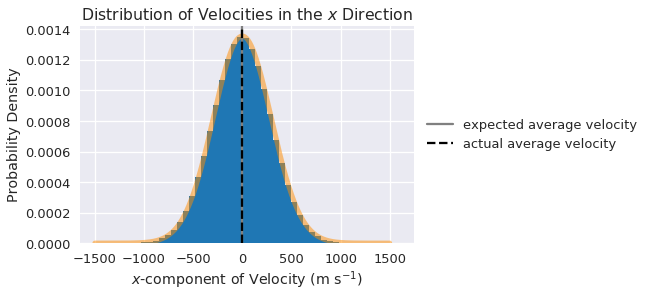

In [4]:
# let's plot a histogram of those values
plt.hist(vx, bins=50, normed=True) 

# always be sure to label your axes
plt.xlabel('$x$-component of Velocity (m s$^{-1}$)')
plt.ylabel('Probability Density')
plt.title('Distribution of Velocities in the $x$ Direction')


# now, let's overplot the analytic shape of the probability distribution
#  first, we create a fine grid of vx values
vx_axis = np.linspace(-1500, 1500, 1000)
#  then, we use the above equation to calculate the probability
probability = 1/np.sqrt(2*np.pi)/sigma*np.exp(-vx_axis**2/2/sigma**2)
#  finally, we plot these x and y values as an orange line
plt.plot(vx_axis, probability, linewidth=5, color='darkorange', alpha=0.5)

# we can plot the expected average value for vx
plt.axvline(0, color='gray', label='expected average velocity')

# we can plot the actual average value of vx, measured from our simulation
vx_average = np.mean(vx)
plt.axvline(vx_average, linestyle='--', color='black', label='actual average velocity')

# add a legend, including the labels that were assigned to each line
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), frameon=False);

Hey, cool! The histogram of random numbers that we created with Python follows the shape of the distribution we draw them from. Maybe that's not so surprising, but it's a useful test! Now, let's expand this to three dimensions of motion, and calculate a few more quantities.



+ Create two more arrays for $v_y$ and $v_z$ in the same way you did for $v_x$, assuming the motion in the three directions is totally independent. Make a scatter plot showing the components $v_x$ vs $v_y$. (Be sure to label your axes).


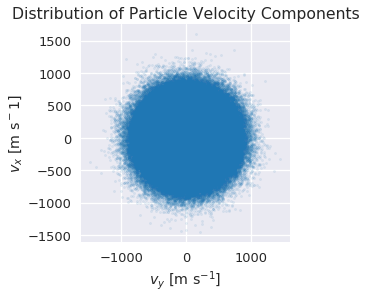

In [5]:
vy = np.random.normal(0,sigma,N)
vz = np.random.normal(0,sigma,N)
plt.scatter(vy, vx, s=5, alpha=0.1)
plt.ylabel(r'$v_x$ [m s$^-1$]')
plt.xlabel(r'$v_y$ [m s$^{-1}$]')
plt.axes().set_aspect('equal')
plt.title('Distribution of Particle Velocity Components')

+ Plot a histogram of the kinetic energy of the molecules, $E_{kinetic} = \frac{1}{2}mv^2$, where $v^2 = v_x^2 + v_y^2 + v_z^2$. Be sure to label your axes. The average kinetic energy of the molecules' translational motion should be $\frac{3}{2}k_B T$. Show that this statement agrees with the average kinetic energy  you measure for the particles in your simulation.




Actual particle average is: 6.06583587052e-21
3/2 k_B T prediction is: 6.0651e-21
Percentage difference is: -0.0121328670233%


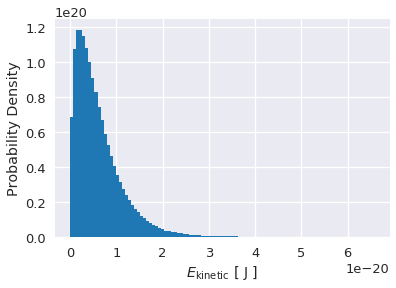

In [6]:
total_v_2 = vx**2 + vy**2 + vz**2
e_kinetic = 0.5*mass*total_v_2
test_avg = 1.5*k_B*temperature
print_str = 'Actual particle average is: ' + str(np.mean(e_kinetic))
print_str2 = '3/2 k_B T prediction is: ' + str(test_avg)
print(print_str)
print(print_str2)
percent_diff = 100*(test_avg - np.mean(e_kinetic))/test_avg
print_str3 = 'Percentage difference is: ' + str(percent_diff) + '%'
print(print_str3)
plt.hist(e_kinetic, bins=100, normed=True)
plt.xlabel(r'$E_{\mathrm{kinetic}}$ [ $\mathrm{J}$ ]')
plt.ylabel('Probability Density')

+ Plot a histogram of $s = \sqrt{v^2}$, where $s$ indicates the speed of the particples (the magnitude of their 3D velocity vectors). Show that your simulation obeys the Maxwell-Boltzmann distribution that the probability of a molecule having a total speed between $s$ and $s + ds$ is
$$ f(s)ds = \sqrt{\frac{2}{\pi}} \frac{s^2}{\sigma^3} \exp \left(\frac{-s^2}{2 \sigma^2} \right)ds $$
where $\sigma$ follows the same definition as above. Of course, now only $s>0$ values make sense; you can't have a negative speed.



Note that the escape velocity of 67P/Churyumov-Gerasimenko
assumes that its volume is reshaped into a sphere.

The escape velocity of Earth is : 11185.7935328 m/s
The escape velocity of 67P/Churyumov-Gerasimenko is : 0.899554164433 m/s


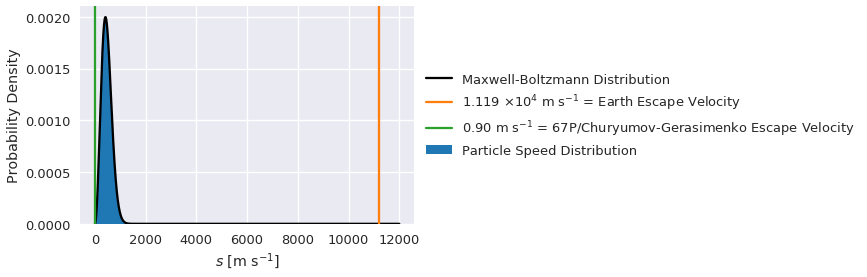

In [7]:
particle_speed = np.sqrt(total_v_2)
plt.hist(particle_speed, bins=100, normed=True, label='Particle Speed Distribution')
s_array = np.linspace(0.0, 12000.0, 120000)
probability = np.sqrt(2/np.pi)*(s_array**2 / sigma**3)*np.exp((-s_array**2/(2.0*sigma**2)))
plt.plot(s_array, probability, '-k', label='Maxwell-Boltzmann Distribution')
plt.xlabel(r'$s$ [m s$^{-1}$]')
plt.ylabel('Probability Density')

earth_escape = np.sqrt(2.0*grav_constant*m_earth/r_earth)
comet_escape = np.sqrt(2.0*grav_constant*m_comet/r_comet)
y_line = np.linspace(0.0, 0.0021, 1000)
plt.plot([earth_escape]*1000, y_line, '-', label=r'1.119 $ \times 10^{4}$ m s$^{-1}$ = Earth Escape Velocity')
plt.plot([comet_escape]*1000, y_line, '-', label=r'0.90 m s$^{-1}$ = 67P/Churyumov-Gerasimenko Escape Velocity')
plt.legend(loc='center right', bbox_to_anchor=(2.35, 0.5),frameon=False )
# plt.xscale('log')
plt.ylim(0.0, 0.0021)
#fig.set_size_inches(50, 20)
print('Note that the escape velocity of 67P/Churyumov-Gerasimenko\nassumes that its volume is reshaped into a sphere.\n')
print_str_earth = 'The escape velocity of Earth is : ' + str(earth_escape) + r' m/s'
print_str_comet = 'The escape velocity of 67P/Churyumov-Gerasimenko is : ' + str(comet_escape) + r' m/s'
print(print_str_earth)
print(print_str_comet)

+ Indicate with vertical lines on your plot the gravitational escape speed of the planet Earth and the (approximate) escape speed of the comet 67P/Churyumov–Gerasimenko. Discuss the implications for the long-term persistence of an atmosphere on these two bodies.

$\textbf{Answer:}$
The  line marking the escape velocity of 67P/Churyumov-Gerasimenko at $\sim 1 \textrm{ m s}^{-1}$ shows that nearly all atoms would escape this model atmosphere whereas the  line marking the escape velocity of Earth at $\sim 11200\textrm{ m s}^{-1}$ suggests that practically no atoms would have the kinetic energy to escape the Earth.

### Q3: Pressure, Force, Mass, Number

*(Feel free to answer this question on pencil and paper, and submit it separately from your jupyter notebook.)*

Earth's atmosphere is composed of roughly $78\%~N_2$, $21\%~O_2$, $1\%~Ar$ (when measured as fractions of the numbers of molecules in the atmosphere). Please calculate answers (sometimes very approximate ones) to the following questions. (Note, a periodic table and the basic physical parameters of the Earth will come in handy here.)


+ Given the above surface pressure of $1.01~bar$, what is the column mass of Earth's atmosphere (in $kg/m^2$, indicating the mass sitting on top of any given 1x1 meter square patch of the surface)?
+ What is the total mass of Earth's global atmosphere?
+ Show that the mean molecular weight of Earth's air is about 29 (when measured in atomic mass units). 
+ How many molecules does Earth's atmosphere contain (approximately)?
+ When I fill my lungs with air, about how many molecules do I inhale (very approximately)?
+ Which is larger -- the number breaths of air in Earth's atmosphere, or the number of molecules in one breath of air?





In [8]:
pressure_newtonm2 = 1.01e5
grav_acc = 9.872
mass_m2 = pressure_newtonm2/grav_acc
print_str = 'The mass of a column of the Earth\'s atmosphere\nabove a meter-square patch is: ' + "{:E}".format(mass_m2) + ' kg'
sa_earth = 4.0*np.pi*(r_earth**2.0)
mass_atm = mass_m2*sa_earth
print_str_2 = '\nThe mass of all of the Earth\'s atmosphere is: ' + "{:E}".format(mass_atm) + ' kg'
print(print_str)
print(print_str_2)

The mass of a column of the Earth's atmosphere
above a meter-square patch is: 1.023096E+04 kg

The mass of all of the Earth's atmosphere is: 5.218447E+18 kg


In [9]:
n2_mol_weight = 28.0134
o2_mol_weight = 15.999*2.0
ar_mol_weight = 39.948
mean_mol_weight = 0.78*n2_mol_weight + 0.21*o2_mol_weight + 0.01*ar_mol_weight
print_str = 'The mean molecular weight of Earth\'s atmosphere is: ' + "{:f}".format(mean_mol_weight) + ' amu'
print(print_str)

The mean molecular weight of Earth's atmosphere is: 28.969512 amu


In [10]:
# amu = g/mol NOT kg/mol
from scipy.constants import N_A
n_molecules = int(mass_atm*1000.0*N_A/mean_mol_weight)
print_str = 'The number of molecules in Earth\'s atmosphere is roughly ' + "{:E}".format(n_molecules)
print(print_str)

The number of molecules in Earth's atmosphere is roughly 1.084803E+44


In [11]:
#Wikipedia claims average tidal volume (resting breathing volume) is 0.5 l
breath_volume = 0.0005
number_density_Earth = pressure_newtonm2/(k_B*temperature)
n_mol_breath = breath_volume*number_density_Earth
print_str = 'The number of molecules in a single breath is roughly ' + "{:E}".format(n_mol_breath) + '\n'
print(print_str)
vol_Earth_atm = n_molecules/number_density_Earth
breaths_atm = vol_Earth_atm/breath_volume
print_str_2 = 'The number of breaths in the Earth\'s atmosphere is roughly ' + "{:E}".format(breaths_atm) + '\n'
print(print_str_2)
factor_print = n_mol_breath/breaths_atm
print_str_3 = 'The number of molecules in a breath is greater than \nthe number of breaths in the atmosphere by a factor of roughly ' + '{:.1f}'.format(factor_print)
print(print_str_3)

The number of molecules in a single breath is roughly 1.248949E+22

The number of breaths in the Earth's atmosphere is roughly 8.685731E+21

The number of molecules in a breath is greater than 
the number of breaths in the atmosphere by a factor of roughly 1.4
